In [77]:
import pandas as pd
import numpy as np

In [78]:
central_selectors = [(2, 2), (2, 7), (2, 13), (12, 5), (25,8)]
left_branch_selectors= [(2, 1), (1,7), (2, 12), (11, 5), (25,7)]
right_branch_selectors = [(2, 3), (3, 7), (2, 14), (13, 5), (25,9)]

In [79]:
central, left, right = list(), list(), list()
for j in range(1, 11):
    central.append([pd.read_excel("new_data1.xlsx", header=None, sheet_name='Лист%s'%j).loc[sel] for sel in central_selectors])
    left.append([pd.read_excel("new_data1.xlsx", header=None, sheet_name='Лист%s'%j).loc[sel] for sel in left_branch_selectors])
    right.append([pd.read_excel("new_data1.xlsx", header=None, sheet_name='Лист%s'%j).loc[sel] for sel in right_branch_selectors])

central = np.array(central)
left = np.array(left)
right = np.array(right)

In [80]:
rates = central / (right + left + central)
print(rates)

[[0.57423313 0.41880342 0.41836735 0.51219512 0.42857143]
 [0.6314741  0.43690852 0.44404332 0.54471545 0.44776119]
 [0.53453453 0.4241573  0.41447368 0.38095238 0.45833333]
 [0.55525606 0.33009709 0.43382353 0.52542373 0.25806452]
 [0.50948905 0.41547278 0.4        0.72413793 0.42857143]
 [0.65309735 0.49864499 0.42391304 0.41666667 0.44615385]
 [0.67102397 0.49512987 0.47540984 0.48275862 0.44285714]
 [0.52870608 0.44246353 0.42857143 0.41880342 0.46938776]
 [0.51485149 0.33173077 0.38405797 0.43396226 0.43478261]
 [0.51600985 0.33651551 0.38297872 0.42592593 0.43478261]]


In [81]:
np.std(rates, axis=0)

array([0.05804603, 0.0591708 , 0.02649648, 0.09438185, 0.05696502])

In [82]:
np.mean(rates, axis=0)

array([0.56886756, 0.41299238, 0.42056389, 0.48655415, 0.42492659])

In [83]:
np.std(rates, axis=0)/np.mean(rates, axis=0)

array([0.10203785, 0.14327334, 0.06300226, 0.19398016, 0.13405849])

## Central stem modelling

In [84]:
alpha = np.sum(central[:,:-1] * central[:,1:], axis=1) / np.sum(central[:,:-1] * central[:,:-1], axis=1)

In [91]:
np.std(alpha)

0.052636967460666234

In [85]:
alpha

array([0.42116663, 0.44137804, 0.42214535, 0.34322355, 0.42044825,
       0.48123489, 0.49041344, 0.4397167 , 0.33857796, 0.34273231])

In [86]:
np.mean(central[:,1:] - alpha[:,np.newaxis] * central[:,:-1], axis=1)


array([ 1.53017358,  2.7606953 , -0.43858465,  3.75584383,  3.31343526,
       -5.14967529, -1.5274164 , -0.58520967,  2.67397077,  2.41988038])

In [87]:
np.std(central[:,1:] - alpha[:,np.newaxis] * central[:,:-1], axis=1)

array([ 3.46307448,  5.9124609 ,  1.39518876,  7.86084502,  8.34057042,
       12.35560954,  2.8444421 ,  2.17146798,  3.51273073,  3.17132174])

In [88]:
from pylab import *
plot(z)

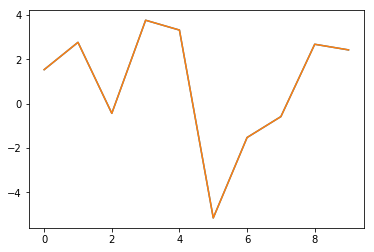

In [89]:
show()